### Below an example of how to retreive the results of a single arxiv query, with the search term "all:electron"

In [1]:
    import urllib, urllib.request
    url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=1'
    data = urllib.request.urlopen(url)
    print(data.read().decode('utf-8'))

<?xml version="1.0" encoding="UTF-8"?>
<feed xmlns="http://www.w3.org/2005/Atom">
  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D1" rel="self" type="application/atom+xml"/>
  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=1</title>
  <id>http://arxiv.org/api/cHxbiOdZaP56ODnBPIenZhzg5f8</id>
  <updated>2022-10-31T00:00:00-04:00</updated>
  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">189264</opensearch:totalResults>
  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>
  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1</opensearch:itemsPerPage>
  <entry>
    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>
    <updated>2001-02-28T20:12:09Z</updated>
    <published>2001-02-28T20:12:09Z</published>
    <title>Impact of Electron-Electron Cusp on Configur

### For optimal data query bertopic must be better understood

In [4]:
import pandas as pd
import re

#### Below is the example from bertopic website, running it here to get a better understanding of how the date should be formatted

In [5]:
# Prepare data
trump = pd.read_csv('https://drive.google.com/uc?export=download&id=1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6')
trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :]
timestamps = trump.date.to_list()
tweets = trump.text.to_list()

In [12]:
timestamps[0]

'2011-08-02 18:07:48'

In [13]:
tweets[0]

'republicans and democrats have both created our economic problems'

#### Two lists, each with corresponding date and data

### To Scrape each org of workshops custom code must be written for each, below is AAAI

Scrape this class attribute: et_pb_text_inner
et_pb_text_inner

In [20]:
AAAIUrl = ['https://aaai.org/Conferences/AAAI-18/ws18workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-19/ws19workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-20/ws20workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-21/ws21workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-22/ws22workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-23/ws23workshops/#ws01']

AAAIDiv = 'et_pb_text_inner'


In [70]:
import requests
import csv
from bs4 import BeautifulSoup as bs

In [21]:
for year, url in enumerate(AAAIUrl, start = 2018):
    
    req = requests.get(url)
    soup = bs(req.text, 'html.parser')
      
    abstracts = soup.find_all('div',attrs = {'class',AAAIDiv})
    
    with open('abstracts_AAAI', 'a') as f:
        
        write = csv.writer(f)
        
        for abstractNumber in range(0,len(abstracts)):
            
            write.writerow([abstracts[abstractNumber].text, f'{year}'])

### Importing the data here to test for fuck ups 

In [22]:
data = pd.read_csv(r'abstracts_AAAI')
df = pd.DataFrame(data)
df.columns = ['abstract', 'year']
#df = df.dropna(axis=0)

In [33]:
df

abstract  year
0   \nImportant Dates for Workshop Organizers\n\n\...  2018
1   \n\nW1: Affective Content Analysis\nW2: AI and...  2018
2   \n\nW01 — Affective Content Analysis\nAffect a...  2018
3   \nThis site is protected by copyright and trad...  2018
4   AAAI-19 Workshop Program\nJanuary 27-28, 2019\...  2019
5   Important Dates for Workshop Organizers\n\n\nN...  2019
6    \n\nW1: Affective Content Analysis: Modeling ...  2019
7   \nW01 — Affective Content Analysis: Modeling A...  2019
8   This site is protected by copyright and tradem...  2019
9   AAAI-20 Workshop Program\nFebruary 7-8, 2020Ne...  2020
10  Important Dates for Workshop Organizers\n\n\nN...  2020
11   \n\nW1: Affective Content Analysis (AffCon 20...  2020
12  \nW1 — Affective Content Analysis (AffCon 2020...  2020
13  This site is protected by copyright and tradem...  2020
14  AAAI-21 Workshop Program\nThe Thirty-Fifth AAA...  2021
15  Important Dates for Workshop Organizers\n\n\nN...  2021
16   \n\nW1: Affective Content Analysis (AffCon@AA...  2021
17  \nW1: Affective Content Analysis (AffCon)\nAff...  2021
18  This site is protected by copyright and tradem...  2021
19  AAAI-22 Workshop Program\nThe Thirty-Sixth AAA...  2022
20  Important Dates for Workshop Organizers\n\n\nN...  2022
21  \nW1: Adversarial Machine Learning and Beyond\...  2022
22  \nW1: Adversarial Machine Learning and Beyond\...  2022
23  This site is protected by copyright and tradem...  2022
24  AAAI-23 Workshop Program\nThe Thirty-Seventh A...  2023
25  \nW1: AI for Agriculture and Food Systems \nW2...  2023
26  \nW1: AI for Agriculture and Food Systems\nAn ...  2023
27  This site is protected by copyright and tradem...  2023

## ICLR

Luckily uses the same layout as ICLM, so not much custom code has to be written.

In [35]:
array18 = [[2018],[*range(402,583)]]
array19 = [[2019],[*range(629,637),1207]]
array20 = [[2020],[*range(1295,1309)]]
array21 = [[2021],[*range(2121, 2148)]]
array22 = [[2022],[*range(4547,4565),9069]]

allArrays = [array18, array19, array20, array21, array22]

In [36]:
for array in allArrays:
    
    for eventID in array[1]:
    
        #Change below later so can iterate through all arrays from 17-22
        year = array[0][0]
    
        URL = f'https://iclr.cc/Conferences/{year}/Schedule?showEvent={eventID}'

        #print(URL, year)
    
        req = requests.get(URL)
        soup = bs(req.text, 'html.parser')
      
        abstracts = soup.find_all('div',attrs = {'class','abstractContainer'})
        #authors = soup.find_all('div', attrs = {'class', 'maincardfooter'})
    
        with open('abstracts_iclr', 'a') as f:
        
            write = csv.writer(f)
        
            for abstractNumber in range(0,len(abstracts)):
                #print(abstracts[abstractNumber].text)
            
         #       write.writerow([abstracts[abstractNumber].text, f'{authors}', f'{year}'])

In [37]:
data = pd.read_csv(r'abstracts_iclr')
df = pd.DataFrame(data)
df.columns = ['abstract', 'year']
#df = df.dropna(axis=0)
df

abstract  year
0    Deep reinforcement learning algorithms have re...  2018
1    Tractable approximate Bayesian inference for d...  2018
2    We argue for the benefit of designing deep gen...  2018
3    The field of ML is distinguished both by rapid...  2018
4    GANS are powerful generative models that are a...  2018
..                                                 ...   ...
244  The constant progress being made in artificial...  2022
245  Emergent Communication (EC) studies learning t...  2022
246  We are at a pivotal moment in healthcare chara...  2022
247  While the study of generalization has played a...  2022
248  A whole-day event celebrating and summarizing ...  2022

[249 rows x 2 columns]

## NeurIPS

#### NeurIPS has an idential layout to ICLM and ICLR, aren't we just lucky.

In [39]:
array18 = [[2018],[*range(10903,10946)]]
array19 = [[2019],[*range(13154,13204),15423]]
array20 = [[2020],[*range(16103,16162),[19593, 19592]]]
array21 = [[2021],[*range(21827,21886)]]
array22 = [[2022],[*range(49957,50019)]]

allArrays = [array18, array19, array20, array21, array22]

In [40]:
for array in allArrays:
    
    for eventID in array[1]:
    
        #Change below later so can iterate through all arrays from 17-22
        year = array[0][0]
    
        URL = f'https://nips.cc/Conferences/{year}/Schedule?showEvent={eventID}'

        #print(URL, year)
    
        req = requests.get(URL)
        soup = bs(req.text, 'html.parser')
      
        abstracts = soup.find_all('div',attrs = {'class','abstractContainer'})
    
        with open('abstracts_neurIps', 'a') as f:
        
            write = csv.writer(f)
        
            for abstractNumber in range(0,len(abstracts)):
                #print(abstracts[abstractNumber].text)
            
                write.writerow([abstracts[abstractNumber].text, f'{year}'])

In [27]:
data = pd.read_csv(r'abstracts_iclr')
dfNeurIps = pd.DataFrame(data)
dfNeurIps.columns = ['abstract', 'year']
#df = df.dropna(axis=0)

## IJCAI

In [66]:
IJCAIUrl = [['https://ijcai-22.org/workshop/', 'elementor-widget-container', 2022],
          ['https://ijcai-21.org/workshops/','entry-content clear', 2021],
          ['https://ijcai20.org/workshops/','content-wrap', 2020],]    

In [71]:
for url, div, year in IJCAIUrl:
    #Change below later so can iterate through all arrays from 17-22
    
    #print(URL, year)
    
    req = requests.get(url)
    soup = bs(req.text, 'html.parser')
      
    abstracts = soup.find_all('div',attrs = {'class', div})
    
    with open('abstracts_IJCAI', 'a') as f:
        
        write = csv.writer(f)
        
        for abstractNumber in range(0,len(abstracts)):            
            write.writerow([abstracts[abstractNumber].text, f'{year}'])

In [92]:
data = pd.read_csv(r'abstracts_IJCAI')
dfIJCAI = pd.DataFrame(data)
dfIJCAI.columns = ['abstract', 'year']
#df = df.dropna(axis=0)

In [93]:
#Drop a row from dataframe 
dfIJCAI.drop(1, inplace=True) 
dfIJCAI.drop(0, inplace=True) 

In [94]:
dfIJCAI

abstract  year
2  \nW01: Trustworthy Federated LearningHan Yu, Z...  2022
3  \nW01: 1st International Workshop on Continual...  2021
4  \n\n\n\n\nWorkshops\n\n\n\n\nIDSessionsWorksho...  2020

#### Now we add the manually created IJCAI data

In [153]:
IJCAI2018 = pd.read_csv('2018-IJCAI.csv')
IJCAI2019 = pd.read_csv('2019-IJCAI.csv')

IJCAI2018.columns = ['abstract', 'year']
IJCAI2019.columns = ['abstract', 'year']


#Concat df and sort by the value 'year'
IJCAI_manual = [IJCAI2019, IJCAI2018, dfIJCAI]
IJCAI_merged = pd.concat(IJCAI_manual)
IJCAI_merged = IJCAI_merged.sort_values('year')

In [154]:
IJCAI_merged

abstract  year
6   The one-day workshop focuses on the technical ...  2018
22  The AI for Wildlife Conservation (AIWC) Worksh...  2018
21  Call for Papers\r\n\r\nThe Joint Workshop on A...  2018
20  The objective of the workshop is to be an inte...  2018
19  The Workshop\r\n\r\nThe Artificial Intelligenc...  2018
..                                                ...   ...
26  We have roughly defined the ``Language Sense''...  2019
35  Reasoning is a core ability in human cognition...  2019
4   \n\n\n\n\nWorkshops\n\n\n\n\nIDSessionsWorksho...  2020
3   \nW01: 1st International Workshop on Continual...  2021
2   \nW01: Trustworthy Federated LearningHan Yu, Z...  2022

[87 rows x 2 columns]

### Training happens below this line

### Combined training happens here

###### TODO. Clean the dataset better. Links and such should not be part of the training data.

In [155]:
import pandas as pd
import re

In [156]:
#import importlib.abc
#If this godforsaken package complains about torch missing uninstall with pip and reinstall, may be 
#due to conflicts with directory structure around different pyenv, namelig 3.10 and 3.9
from bertopic import BERTopic

In [178]:
# Load the abstracts from scraping.
df1 = pd.read_csv('abstracts_iclr')
df2 = pd.read_csv('abstracts_neurIps')
df3 = pd.read_csv('abstracts_icml')
df4 = pd.read_csv('abstracts_AAAI')

# Assign the df with columns
df1.columns = ['abstract', 'year']
df2.columns = ['abstract', 'year']
df3.columns = ['abstract', 'year']
df4.columns = ['abstract', 'year']

#Concat df and sort by the value 'year'
all_df = [df1, df2, df3, df4, IJCAI_merged]
merged = pd.concat(all_df)
merged = merged.sort_values('year')

In [179]:
len(df1) + len(df2) + len(df3) + len(df4) + len(IJCAI_merged)

784

### Data Cleaning

In [180]:
merged

abstract  year
0   In recent years, deep learning has revolutioni...  2017
1   For details see:http://machlearn.gitlab.io/hit...  2017
20  The workshop will contain presentations of lat...  2017
19  Deep networks have had profound impact across ...  2017
18  This workshop will bring together researchers ...  2017
..                                                ...   ...
2   \nW01: Trustworthy Federated LearningHan Yu, Z...  2022
27  This site is protected by copyright and tradem...  2023
26  \nW1: AI for Agriculture and Food Systems\nAn ...  2023
25  \nW1: AI for Agriculture and Food Systems \nW2...  2023
24  AAAI-23 Workshop Program\nThe Thirty-Seventh A...  2023

[784 rows x 2 columns]

In [181]:
merged['abstract'] = merged['abstract'].astype(str)

In [182]:
# Remove any leading or trailing whitespace
merged['abstract'] = merged['abstract'].str.strip() 

# Remove any special characters from the column
merged['abstract'] = merged['abstract'].str.replace('[^\w\s.]','')

# Change all text to be lowercase
merged['abstract'] = merged['abstract'].str.lower()

In [183]:
merged

abstract  year
0   in recent years deep learning has revolutioniz...  2017
1   for details seehttpmachlearn.gitlab.iohitl2017...  2017
20  the workshop will contain presentations of lat...  2017
19  deep networks have had profound impact across ...  2017
18  this workshop will bring together researchers ...  2017
..                                                ...   ...
2   w01 trustworthy federated learninghan yu zehui...  2022
27  this site is protected by copyright and tradem...  2023
26  w1 ai for agriculture and food systems\nan inc...  2023
25  w1 ai for agriculture and food systems \nw2 ai...  2023
24  aaai23 workshop program\nthe thirtyseventh aaa...  2023

[784 rows x 2 columns]

### Bertopic performs better on datasets with sentences or paragraphs instead of whole documents

In [184]:
# Turn each abstract into a series of paragraphs
merged = pd.concat([pd.DataFrame({'abstract': doc, 'year': row['year']}, index=[0]) 
           for _, row in merged.iterrows() 
           for doc in row['abstract'].split('.') if doc != ''])

# Convert abstract and year column into lists 
merged['abstract'] = merged['abstract'].astype(str)
merged_abstract = merged.abstract.tolist()
timestamps_merged = merged.year.tolist()

#### Increases documents with an order of magnitude.

In [209]:
len(merged_abstract)

13567

In [219]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Removes stopwords using countVectorizer
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model, verbose = True, calculate_probabilities=True)

In [ ]:
# Fit the DTM
topics, probs = topic_model.fit_transform(merged_abstract)

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [01:26<00:00,  4.88it/s]
2022-12-04 18:18:50,713 - BERTopic - Transformed documents to Embeddings


In [212]:
#Calculates the probabilities of each topic belonging to a document, I think.
import numpy as np
probability_threshold = 0.01
new_topics = [np.argmax(prob) if max(prob) >= probability_threshold else -1 for prob in probs]

In [213]:
# Apply timeframe data
topics_over_time = topic_model.topics_over_time(merged_abstract, timestamps_merged)

7it [03:25, 29.39s/it]


In [214]:
topic_model.get_topic_info()

Topic  Count                                         Name
0       -1   3518      -1_systems_reinforcement_machine_models
1        0    555   0_ideas_researchers_collaboration_academia
2        1    391                        1_montavon_sin_pgd_hk
3        2    376           2_gradient_neural_descent_networks
4        3    221                 3_ai_aisi_diplomacy_research
..     ...    ...                                          ...
271    270     10         270_decisions_firms_guiding_informed
272    271     10  271_robust_intelligence_scenarios_openworld
273    272     10                272_chair_viliam_chairs_fanny
274    273     10           273_regions_global_risks_countries
275    274     10            274_reports_sdu_presenting_shared

[276 rows x 3 columns]

In [217]:
similar_topics, similarity = topic_model.find_topics("machine", top_n=5)
topic_model.get_topic(similar_topics[0])

[('systems', 0.0038074349715864196),
 ('reinforcement', 0.0035496578780864485),
 ('machine', 0.0034252528911526948),
 ('models', 0.0032974372738995912),
 ('agents', 0.0028393496309331535),
 ('applications', 0.0027477798564124545),
 ('algorithms', 0.0027058446777418984),
 ('ai', 0.0025223429277138444),
 ('tasks', 0.0023817981477619707),
 ('training', 0.0023488482542982922)]

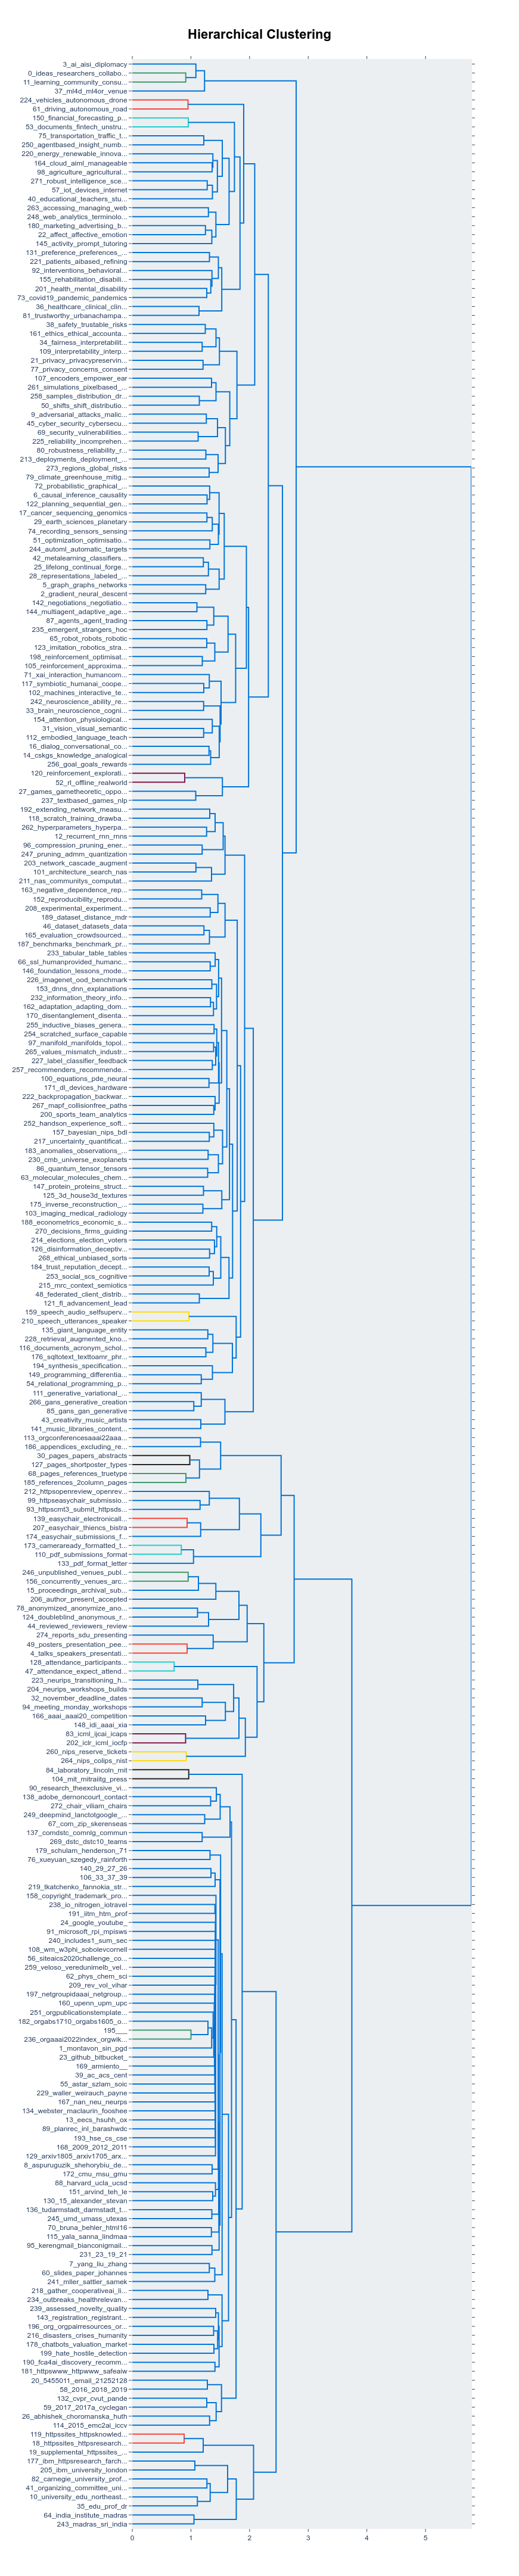

In [218]:
topic_model.visualize_hierarchy()

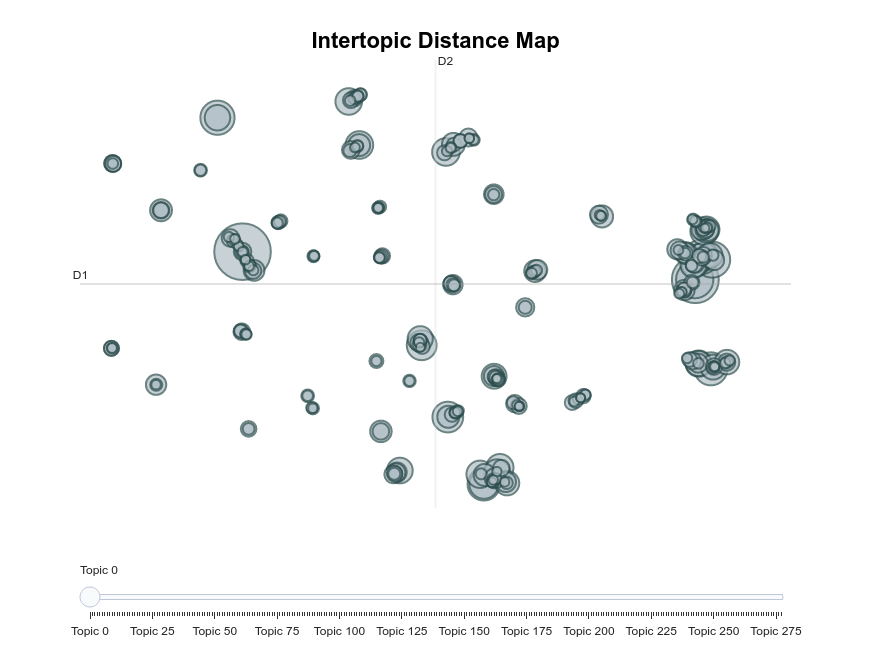

In [199]:
topic_model.visualize_topics()

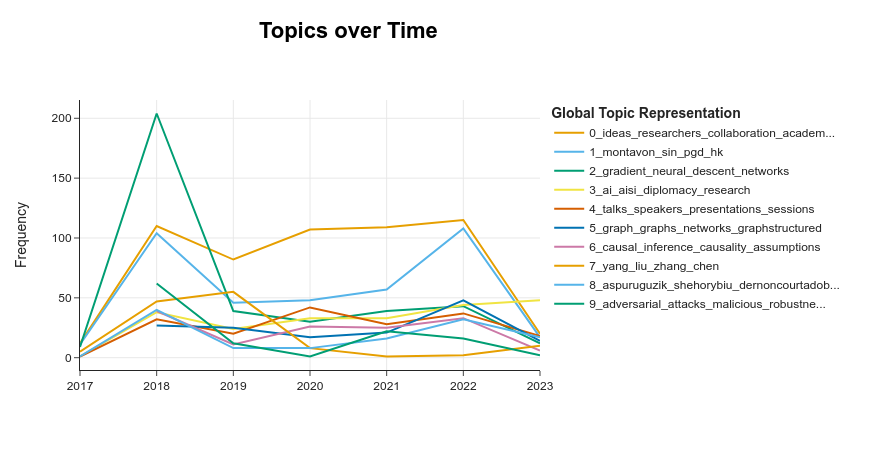

In [215]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

### Hierarchical Topic Modeling

In [206]:
from scipy.cluster import hierarchy as sch
from bertopic import BERTopic
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(merged_abstract)

2022-12-04 17:50:55,420 - BERTopic - Transformed documents to Embeddings
2022-12-04 17:51:02,873 - BERTopic - Reduced dimensionality
2022-12-04 17:51:03,603 - BERTopic - Clustered reduced embeddings


NameError: name 'docs' is not defined

In [207]:
# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(merged_abstract, linkage_function=linkage_function)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267/267 [00:02<00:00, 99.68it/s]


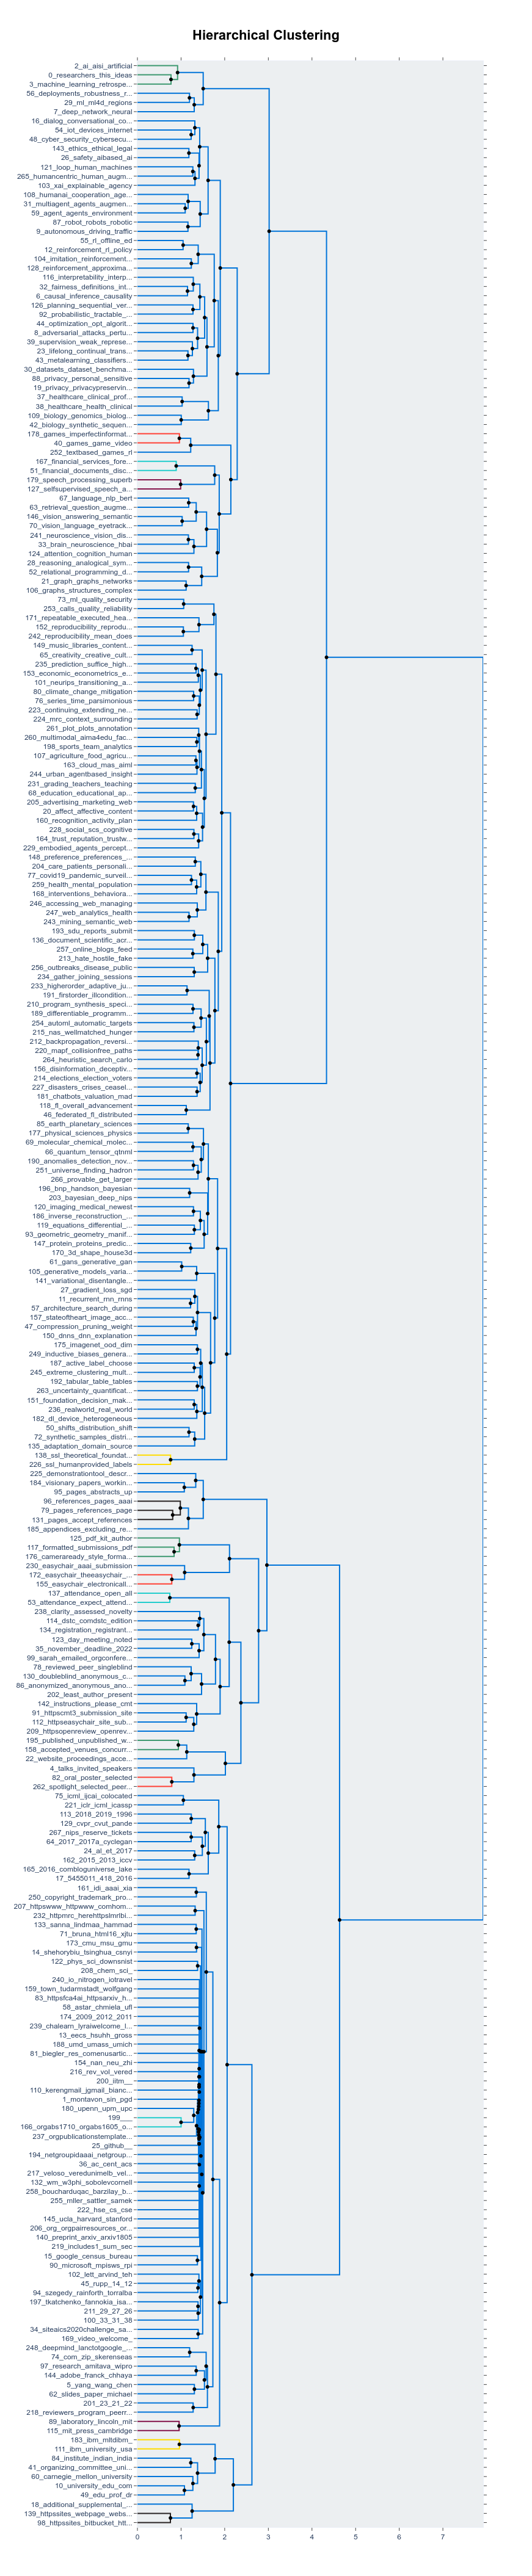

In [208]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)